In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [57]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [58]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [59]:
df.dropna(inplace=True)

In [60]:
df.shape

(714, 3)

In [61]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [62]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [65]:
clf=DecisionTreeClassifier()

In [66]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
clf.score(X_test,y_test)

0.6433566433566433

In [68]:
clf=DecisionTreeClassifier()

In [69]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring="accuracy"))

0.6289319248826291

## KBinDiscretizer

1. Using quantile strategy

In [70]:
kbin_age=KBinsDiscretizer(n_bins=20,encode="ordinal",strategy="quantile")
kbin_fare=KBinsDiscretizer(n_bins=20,encode="ordinal",strategy="quantile")


In [71]:
trf=ColumnTransformer([
    ("first",kbin_age,[0]),
    ("second",kbin_fare,[1])
])

In [72]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [73]:
X_train_trf

array([[11., 11.],
       [ 8.,  9.],
       [11., 10.],
       ...,
       [15., 19.],
       [12., 11.],
       [12.,  4.]])

In [74]:
trf.named_transformers_["first"].bin_edges_

array([array([ 0.42,  4.  , 14.  , 18.  , 19.  , 21.  , 22.  , 24.  , 25.  ,
              27.  , 28.5 , 30.  , 32.  , 34.  , 36.  , 39.  , 42.  , 45.5 ,
              50.  , 57.5 , 80.  ])                                         ],
      dtype=object)

In [75]:
trf.named_transformers_["second"].bin_edges_

array([array([  0.     ,   7.2292 ,   7.75   ,   7.8542 ,   7.8958 ,   8.05   ,
                9.225  ,  10.5    ,  13.     ,  13.45835,  15.75   ,  20.23125,
               26.     ,  26.41875,  29.125  ,  34.375  ,  51.4792 ,  67.95   ,
               82.1708 , 134.075  , 512.3292 ])                                ],
      dtype=object)

In [76]:
output=pd.DataFrame({
    "age":X_train["Age"],
    "age_trf":X_train_trf[:,0],
    "fare":X_train["Fare"],
    "fare_trf":X_train_trf[:,1]
    })

In [77]:
output

,age,age_trf,fare,fare_trf
328,31.0,11.0,20.5250,11.0
73,26.0,8.0,14.4542,9.0
253,30.0,11.0,16.1000,10.0
719,33.0,12.0,7.7750,2.0
666,25.0,8.0,13.0000,8.0
...,...,...,...,...
92,46.0,17.0,61.1750,16.0
134,25.0,8.0,13.0000,8.0
337,41.0,15.0,134.5000,19.0
548,33.0,12.0,20.5250,11.0


In [78]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
clf.score(X_test_trf,y_test)

0.5874125874125874

In [79]:
X_trf=trf.fit_transform(X)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [85]:
X_trf

array([[ 6.,  1.],
       [15., 16.],
       [ 8.,  4.],
       ...,
       [ 4., 13.],
       [ 8., 13.],
       [12.,  2.]])

In [80]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring="accuracy"))

0.6330985915492957

## Let's create a custom function ,where you just put bins and strategy and it shows distribution before and after applyimh binning along with accuracy score

In [87]:
def discretize(bins,strategy):
    kbina_age=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)
    kbina_fare=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)

    trf=ColumnTransformer([
        ("first",kbin_age,[0]),
        ("second",kbin_fare,[1])
    ])
    X_trf=trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring="accuracy")))

    for i in ["Age","Fare"]:
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        plt.hist(X[i])
        plt.title("Before")

        if i=="Age":

            plt.subplot(122)
            plt.hist(X_trf[:,0],color="red")
            plt.title("After")

            plt.show()    
        elif i=="Fare":
            
            plt.subplot(122)
            plt.hist(X_trf[:,1],color="red")
            plt.title("After")

            plt.show() 

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6289123630672927


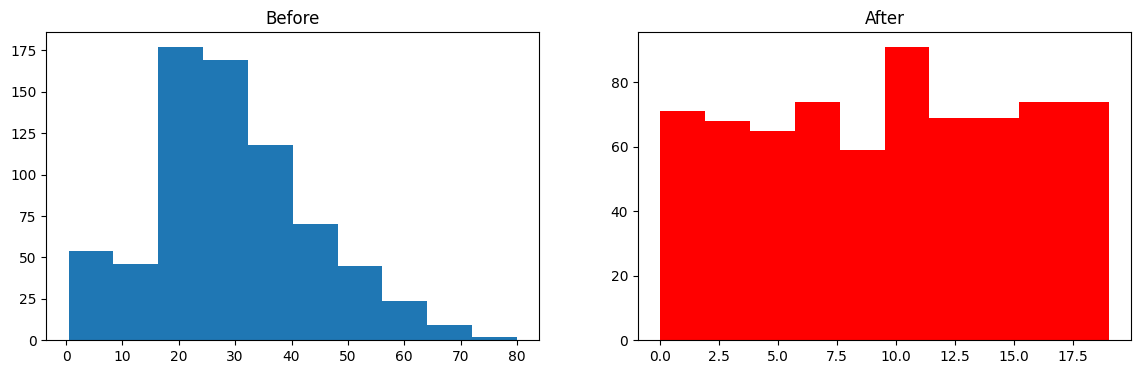

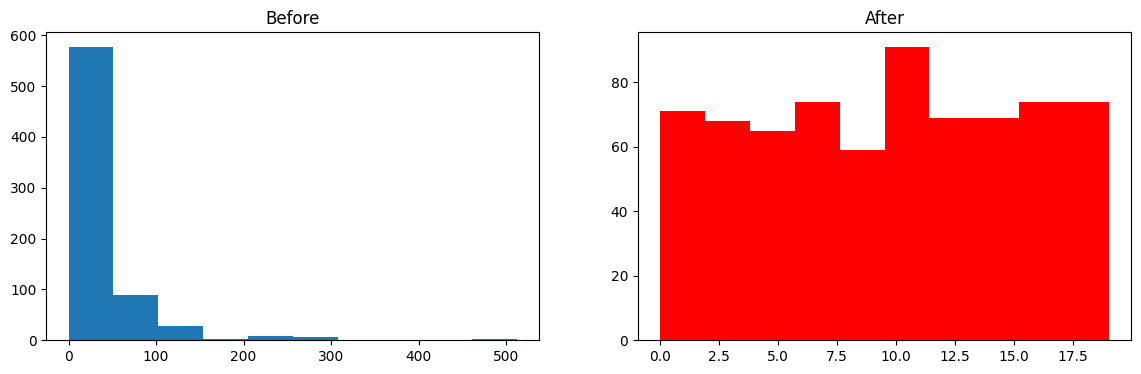

In [84]:
discretize(10,"quantile")